In [1]:
import os
import numpy as np
import json
from PIL import Image

def detect_red_light(I):
    '''
    This function takes a numpy array <I> and returns a list <bounding_boxes>.
    The list <bounding_boxes> should have one element for each red light in the
    image. Each element of <bounding_boxes> should itself be a list, containing
    four integers that specify a bounding box: the row and column index of the
    top left corner and the row and column index of the bottom right corner (in
    that order). See the code below for an example.

    Note that PIL loads images in RGB order, so:
    I[:,:,0] is the red channel
    I[:,:,1] is the green channel
    I[:,:,2] is the blue channel
    '''


    bounding_boxes = [] # This should be a list of lists, each of length 4. See format example below.

    '''
    BEGIN YOUR CODE
    '''

    '''
    As an example, here's code that generates between 1 and 5 random boxes
    of fixed size and returns the results in the proper format.
    '''

    box_height = 8
    box_width = 6

    num_boxes = np.random.randint(1,5)

    for i in range(num_boxes):
        (n_rows,n_cols,n_channels) = np.shape(I)

        tl_row = np.random.randint(n_rows - box_height)
        tl_col = np.random.randint(n_cols - box_width)
        br_row = tl_row + box_height
        br_col = tl_col + box_width

        bounding_boxes.append([tl_row,tl_col,br_row,br_col])

    '''
    END YOUR CODE
    '''

    for i in range(len(bounding_boxes)):
        assert len(bounding_boxes[i]) == 4

    return bounding_boxes


In [2]:
# set the path to the downloaded data:
data_path = 'C:/data/CS 148/RedLights2011_Medium'

# set a path for saving predictions:
preds_path = 'C:/data/hw01_preds'
os.makedirs(preds_path,exist_ok=True) # create directory if needed

# get sorted list of files:
file_names = sorted(os.listdir(data_path))

# remove any non-JPEG files:
file_names = [f for f in file_names if '.jpg' in f]

preds = {}
for i in range(len(file_names)):

    # read image using PIL:
    I = Image.open(os.path.join(data_path,file_names[i]))

    # convert to numpy array:
    I = np.asarray(I)

    preds[file_names[i]] = detect_red_light(I)



In [3]:
# save preds (overwrites any previous predictions!)
with open(os.path.join(preds_path,'preds.json'),'w') as f:
    json.dump(preds,f)


In [4]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

file_names[5]
I = Image.open(os.path.join(data_path,file_names[5]))

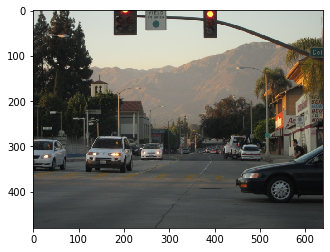

In [5]:
imshow(np.asarray(I))

In [6]:
test_path = 'C:/data/CS 148/test_images'
test_names = sorted(os.listdir(test_path))

In [7]:
test_names

['Control_1_Carlight.png',
 'Control_2_Carlight.png',
 'Control_3_Street.png',
 'Light_1.png',
 'Light_2.png',
 'Light_3.png',
 'Light_4.png',
 'Light_5_Slanted.png']

In [8]:
light1 = Image.open(os.path.join(test_path, test_names[3]))
light2 =  Image.open(os.path.join(test_path, test_names[4]))

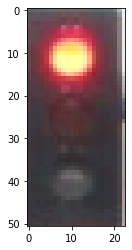

In [9]:
imshow(np.asarray(light1))

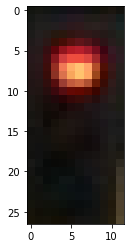

In [10]:
imshow(np.asarray(light2))

In [11]:
light1.size

(23, 51)

In [12]:
test1 = np.asarray(light1)
test2 = np.asarray(light1)
#np.inner(test1, test2)

In [13]:
np.inner(test1[:,:,0], test2[:,:,0])

array([[212, 198,  57, ..., 249, 107, 207],
       [198,  78,  45, ..., 236, 241, 112],
       [ 57,  45, 219, ..., 156,  66,  31],
       ...,
       [249, 236, 156, ...,  15, 217, 189],
       [107, 241,  66, ..., 217,  16,  26],
       [207, 112,  31, ..., 189,  26, 224]], dtype=uint8)

In [14]:
np.dot(test1[:,:,0], test2[:,:,0].transpose())

array([[212, 198,  57, ..., 249, 107, 207],
       [198,  78,  45, ..., 236, 241, 112],
       [ 57,  45, 219, ..., 156,  66,  31],
       ...,
       [249, 236, 156, ...,  15, 217, 189],
       [107, 241,  66, ..., 217,  16,  26],
       [207, 112,  31, ..., 189,  26, 224]], dtype=uint8)

In [15]:
test1.flatten().shape

(3519,)

In [16]:
np.inner(test1.flatten(), test1.flatten())

1

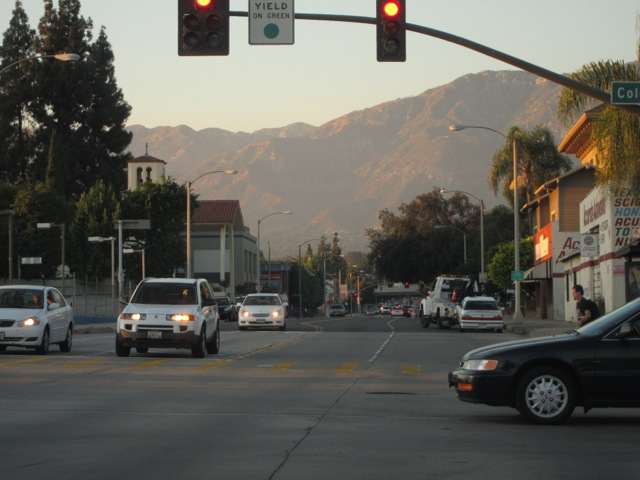

In [17]:
I

In [18]:
Z = I.crop((0, 0, 23, 51))

In [19]:
img1 = ImageDraw.Draw(I)
img1.rectangle((0, 0, 100, 100), outline = "red") # This does what I want

NameError: name 'ImageDraw' is not defined

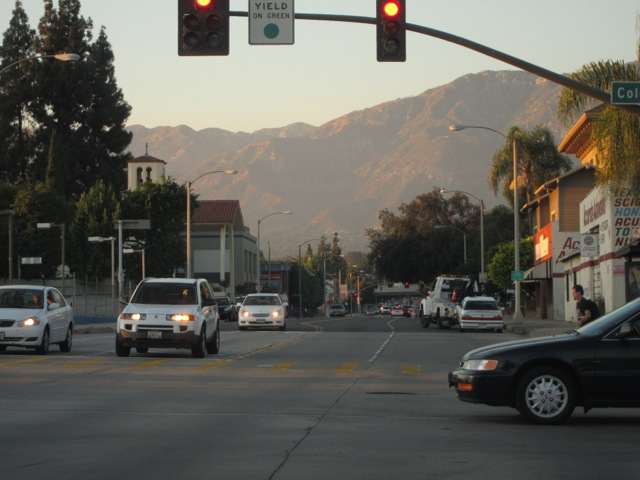

In [20]:
I

In [21]:
#np.inner(Z.flatten(), test1.flatten())
np.inner(np.asarray(Z).flatten(), np.asarray(test1).flatten())

150

In [22]:
vector1 = np.asarray(Z).flatten()
#norm_vector1 = vector1/(np.square(np.linalg.norm(vector1)))
norm_vector1 = vector1/np.linalg.norm(vector1, ord=2)

vector2 = np.asarray(test1).flatten()
#norm_vector2 = vector2/(np.square(np.linalg.norm(vector2)))
norm_vector2 = vector2/np.linalg.norm(vector2, ord=2)



In [23]:
test_normvector2 = vector2/np.linalg.norm(vector2, ord=2)

In [24]:
norm_vector1

array([0.02479973, 0.02567649, 0.02479973, ..., 0.00864233, 0.00901808,
       0.00814133])

In [25]:
np.inner(norm_vector1, norm_vector1)

1.0

In [26]:
np.linalg.norm(norm_vector1)

1.0

In [27]:
picture_width, picture_height = I.size
light1_width, light1_height = light1.size

light1_vector = np.asarray(light1).flatten()
normed_light1 = light1_vector/np.linalg.norm(light1_vector, ord=2)

In [28]:
picture_width
light1

In [29]:
import pandas as pd

match_dictionary = {}

height = 0
for i in range(picture_width - light1_width):
    print(i)
    location = (i, height, i + light1_width, height + light1_height)
    picture_match_location = I.crop(location)
    picture_match_vector = np.asarray(picture_match_location).flatten()
    normed_picture_match_vector = picture_match_vector/(np.linalg.norm(picture_match_vector, ord=2))
    match_prob = np.inner(normed_picture_match_vector, normed_light1)
    match_dictionary[location] = match_prob

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

ValueError: If using all scalar values, you must pass an index

In [35]:
match_df = pd.DataFrame(match_dictionary, index = [0])
match_df

,0,1,2,3,4,5,6,7,8,9,...,607,608,609,610,611,612,613,614,615,616
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,23,24,25,26,27,28,29,30,31,32,...,630,631,632,633,634,635,636,637,638,639
,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
0,0.810583,0.809685,0.807153,0.803462,0.800275,0.795531,0.791519,0.787303,0.784096,0.784477,...,0.86684,0.86686,0.866942,0.86694,0.866983,0.866934,0.86654,0.865092,0.864826,0.865379


In [38]:
match_df.max(axis = 1)

0    0.903107
dtype: float64

In [40]:
match_df.idxmax(axis = 1)

0    (384, 0, 407, 51)
dtype: object

In [30]:
(206, 0, 229, 51)

(206, 0, 229, 51)

In [31]:
#test123 = I.crop((380, 0, 403, 51))
#test123 = I.crop((206, 0, 229, 51))
test123 = I.crop(((49, 0, 72, 51)))
test123

In [32]:
light1

In [33]:
test123.size

(23, 51)

In [ ]:
temp = (1, 2, 3)

In [ ]:
temp